# Kaggle 신용카드 사기 검출 (Google Drive Mount)


## Credit Card Fraud Detection
  * creditcard.csv (284,807 * 31)
  * Class : 0 (정상), 1 (사기)
  * 사기 검출(Fraud Detection), 이상 탐지(Anomaly Detection)


In [1]:
import warnings
warnings.filterwarnings('ignore')

# I. Google Drive Mount

In [2]:
from google.colab import drive

drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [3]:
!ls -l '/content/drive/My Drive/Colab Notebooks/datasets/creditCardFraud.zip'

-rw------- 1 root root 69155672 Mar  4 04:46 '/content/drive/My Drive/Colab Notebooks/datasets/creditCardFraud.zip'


# II. Data Preprocessing

> ## 1) Unzip 'creditCardFraud.zip'

In [4]:
!unzip /content/drive/My\ Drive/Colab\ Notebooks/datasets/creditCardFraud.zip

Archive:  /content/drive/My Drive/Colab Notebooks/datasets/creditCardFraud.zip
replace creditcard.csv? [y]es, [n]o, [A]ll, [N]one, [r]ename: y
  inflating: creditcard.csv          


In [5]:
!ls -l


total 147304
-rw-r--r-- 1 root root 150828752 Sep 20  2019 creditcard.csv
drwx------ 5 root root      4096 Mar  9 04:22 drive
drwxr-xr-x 1 root root      4096 Mar  5 14:37 sample_data


> ## 2) 데이터 읽어오기

  * pandas DataFrame

In [6]:
%%time
import pandas as pd

DF = pd.read_csv('creditcard.csv')
DF.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 18  V18     284807 non-null  float64
 19  V19     284807 non-null  float64
 20  V20     284807 non-null  float64
 21  V21     28

In [7]:
DF.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,0.090794,-0.551600,-0.617801,-0.991390,-0.311169,1.468177,-0.470401,0.207971,0.025791,0.403993,0.251412,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,-0.166974,1.612727,1.065235,0.489095,-0.143772,0.635558,0.463917,-0.114805,-0.183361,-0.145783,-0.069083,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,0.207643,0.624501,0.066084,0.717293,-0.165946,2.345865,-2.890083,1.109969,-0.121359,-2.261857,0.524980,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,-0.054952,-0.226487,0.178228,0.507757,-0.287924,-0.631418,-1.059647,-0.684093,1.965775,-1.232622,-0.208038,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,0.753074,-0.822843,0.538196,1.345852,-1.119670,0.175121,-0.451449,-0.237033,-0.038195,0.803487,0.408542,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


  * 0(정상) Class와 1(사기) Class 개수

In [8]:
DF.Class.value_counts()

0    284315
1       492
Name: Class, dtype: int64

  * 0(정상) Class와 1(사기) Class 비율

In [9]:
(DF.Class.value_counts() / DF.shape[0]) * 100

0    99.827251
1     0.172749
Name: Class, dtype: float64

> ## 3) Time열(Column)삭제

In [10]:
DF.drop('Time', axis = 1, inplace = True)
DF.head(1)

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,0.090794,-0.5516,-0.617801,-0.99139,-0.311169,1.468177,-0.470401,0.207971,0.025791,0.403993,0.251412,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0


> ## 4) train_test_split

In [16]:
X = DF.iloc[:,:-1]
y = DF.iloc[:, -1]

X.shape, y.shape

((284807, 29), (284807,))

> ## 1) Without 'Stratify'

In [53]:
# from sklearn.model_selection import train_test_split

In [54]:
#X_train, X_test, y_train, y_test = train_test_split(X, y,
 #                                                   test_size = 0.3,
  #                                                  random_state = 2045)
#

In [55]:
#X_train.shape, y_train.shape, X_test.shape, y_test.shape


  * Train_data와 Test_data의 1(부정) 비율이 불균형

In [56]:
#print('Train_Data :','\n', (y_train.value_counts() / y_train.shape[0]) * 100)
#print('Test_Data :','\n', (y_test.value_counts() / y_test.shape[0]) * 100)


> ## 2) With 'Stratify'

In [57]:
from sklearn.model_selection import train_test_split 


In [58]:
X_train, X_test, y_train, y_test = train_test_split(X, y,
                                                    test_size = 0.3,
                                                    stratify = y,
                                                    random_state = 2045)


In [59]:
X_train.shape, y_train.shape, X_test.shape, y_test.shape


((199364, 29), (199364,), (85443, 29), (85443,))

  * Train_Data와 Test_Data의 1 (부정) 비율이 균형


In [60]:
print('Train_Data :','\n', (y_train.value_counts() / y_train.shape[0]) * 100)
print('Test_Data :','\n', (y_test.value_counts() / y_test.shape[0]) * 100)


Train_Data : 
 0    99.827451
1     0.172549
Name: Class, dtype: float64
Test_Data : 
 0    99.826785
1     0.173215
Name: Class, dtype: float64


# III. Modeling

> ## 1) 탐색적데이터 분석 (EDA)

In [61]:
import matplotlib.pyplot as plt
import seaborn as sns

In [62]:
import scipy.stats as stats
pearsonr_list = []
for column in DF.columns:
  if column == 'Class' : continue
  pearsonr_list.append([column, stats.pearsonr(DF[column], DF["Class"])[0]])
  print(f'{column} - Class 상관계수 : {stats.pearsonr(DF[column], DF["Class"])[0]}')

V1 - Class 상관계수 : -0.10134729859508598
V2 - Class 상관계수 : 0.09128865034462008
V3 - Class 상관계수 : -0.1929608270674153
V4 - Class 상관계수 : 0.133447486239006
V5 - Class 상관계수 : -0.09497429899144921
V6 - Class 상관계수 : -0.04364316069996437
V7 - Class 상관계수 : -0.18725659151429974
V8 - Class 상관계수 : 0.019875123914794623
V9 - Class 상관계수 : -0.09773268607407976
V10 - Class 상관계수 : -0.21688294364102956
V11 - Class 상관계수 : 0.15487564474394916
V12 - Class 상관계수 : -0.2605929248772196
V13 - Class 상관계수 : -0.004569778799461309
V14 - Class 상관계수 : -0.30254369580440715
V15 - Class 상관계수 : -0.004223402267856705
V16 - Class 상관계수 : -0.1965389403040205
V17 - Class 상관계수 : -0.32648106724371784
V18 - Class 상관계수 : -0.11148525388904237
V19 - Class 상관계수 : 0.034783013036515126
V20 - Class 상관계수 : 0.020090324196975567
V21 - Class 상관계수 : 0.04041338061057595
V22 - Class 상관계수 : 0.0008053175052984462
V23 - Class 상관계수 : -0.0026851557402507364
V24 - Class 상관계수 : -0.007220906715952784
V25 - Class 상관계수 : 0.003307705597299681
V26 - Class 

In [63]:
pearsonr_list.sort(key=lambda x: -x[1])
for i in range(len(pearsonr_list)):
  print(f'{pearsonr_list[i][0]} - Class 상관계수 : {pearsonr_list[i][1]}')

V11 - Class 상관계수 : 0.15487564474394916
V4 - Class 상관계수 : 0.133447486239006
V2 - Class 상관계수 : 0.09128865034462008
V21 - Class 상관계수 : 0.04041338061057595
V19 - Class 상관계수 : 0.034783013036515126
V20 - Class 상관계수 : 0.020090324196975567
V8 - Class 상관계수 : 0.019875123914794623
V27 - Class 상관계수 : 0.01757972818951344
V28 - Class 상관계수 : 0.009536040916236268
Amount - Class 상관계수 : 0.005631753006768727
V26 - Class 상관계수 : 0.0044553975012833836
V25 - Class 상관계수 : 0.003307705597299681
V22 - Class 상관계수 : 0.0008053175052984462
V23 - Class 상관계수 : -0.0026851557402507364
V15 - Class 상관계수 : -0.004223402267856705
V13 - Class 상관계수 : -0.004569778799461309
V24 - Class 상관계수 : -0.007220906715952784
V6 - Class 상관계수 : -0.04364316069996437
V5 - Class 상관계수 : -0.09497429899144921
V9 - Class 상관계수 : -0.09773268607407976
V1 - Class 상관계수 : -0.10134729859508598
V18 - Class 상관계수 : -0.11148525388904237
V7 - Class 상관계수 : -0.18725659151429974
V3 - Class 상관계수 : -0.1929608270674153
V16 - Class 상관계수 : -0.1965389403040205
V10 - Cl

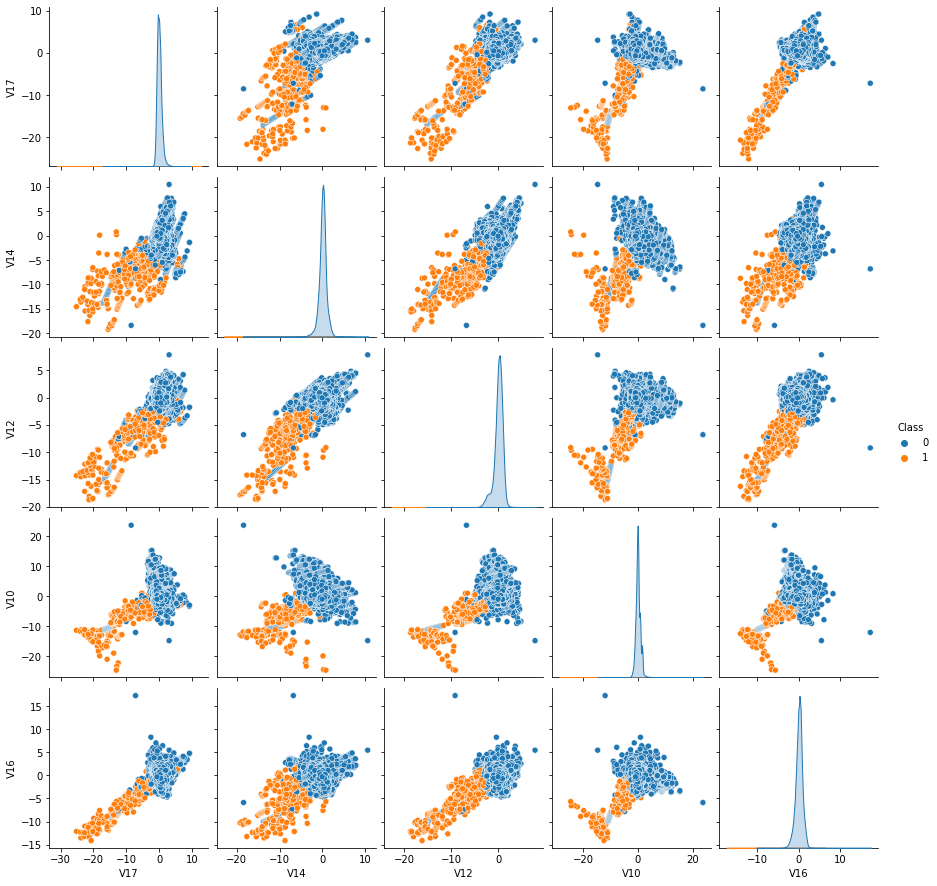

In [31]:
sns.pairplot(hue='Class', data=DF[['V17', 'V14', 'V12', 'V10', 'V16', 'Class']])
plt.show()

> ## 2) Train & Test Split

In [136]:
X = DF.iloc[:, :-1]
y = DF.iloc[:,-1]

X.shape, y.shape

((284807, 29), (284807,))

In [137]:
from sklearn.model_selection import train_test_split

In [138]:
X_train, X_test, y_train, y_test = train_test_split(X, y,
                                                    test_size = 0.3,
                                                    random_state = 2045)

In [139]:
print('Train Data : ', X_train.shape, y_train.shape)
print('Test Data : ', X_test.shape, y_test.shape)

Train Data :  (199364, 29) (199364,)
Test Data :  (85443, 29) (85443,)


> ## 3) 분류 모델링 수행

In [36]:
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import accuracy_score, precision_score, recall_score, confusion_matrix
import numpy as np

> ### 1. Logistic Regression

In [68]:
%%time
from sklearn.linear_model import LogisticRegression

LR = LogisticRegression(C=0.3,
                        penalty='l2',
                        multi_class='multinomial',
                        n_jobs=-1)
LR.fit(X_train, y_train)

CPU times: user 111 ms, sys: 75.2 ms, total: 186 ms
Wall time: 12.4 s


  * 평가

In [69]:
confusion_matrix(y_test, LR.predict(X_test))

array([[85286,    13],
       [   53,    91]])

In [70]:
print(accuracy_score(y_test, LR.predict(X_test)), '\n')
print(precision_score(y_test, LR.predict(X_test), pos_label= 1), '\n')
LR_recall = recall_score(y_test, LR.predict(X_test), pos_label= 1)
LR_recall

0.9992275552122467 

0.875 



0.6319444444444444

> ### 2. Decision Tree Classifier

In [71]:
%%time
from sklearn.tree import DecisionTreeClassifier
DT = DecisionTreeClassifier(criterion = 'entropy',
                            max_depth = 5,
                            random_state = 2045)

DT.fit(X_train, y_train)

CPU times: user 8.67 s, sys: 4.27 ms, total: 8.67 s
Wall time: 8.66 s


  * 평가

In [72]:
confusion_matrix(y_test, DT.predict(X_test))

array([[85283,    16],
       [   36,   108]])

In [97]:
print(accuracy_score(y_test, DT.predict(X_test)), '\n')
print(precision_score(y_test, DT.predict(X_test), pos_label= 1), '\n')
DT_recall = recall_score(y_test, DT.predict(X_test), pos_label= 1)
DT_recall

0.9993914071369217 

0.8709677419354839 



0.75

  * Feature Importance

In [75]:
DT.feature_importances_


array([0.        , 0.        , 0.00822908, 0.02384532, 0.        ,
       0.        , 0.00835155, 0.        , 0.        , 0.10116084,
       0.        , 0.00690829, 0.        , 0.72185417, 0.        ,
       0.02007405, 0.08706776, 0.        , 0.        , 0.00250833,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.00957612, 0.01042449, 0.        , 0.        ])

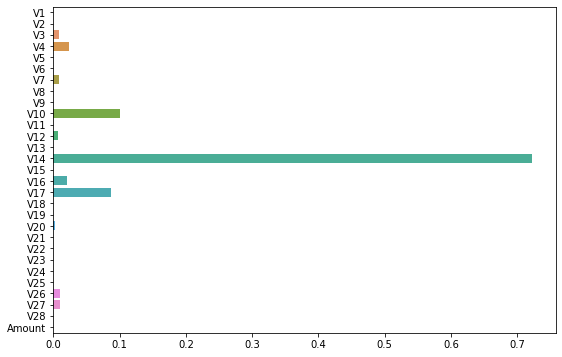

In [82]:
plt.figure(figsize = (9, 6))
sns.barplot(DT.feature_importances_,
            DF.columns.drop(['Class']))
plt.show()

> ### 3. Random Forest Classifier

In [83]:
%%time
from sklearn.ensemble import RandomForestClassifier
RF = RandomForestClassifier(criterion = 'entropy',
                            n_estimators = 100,
                            max_features = 4,
                            max_depth = 5,
                            random_state = 2045,
                            n_jobs = -1)
RF.fit(X_train, y_train)

CPU times: user 1min 59s, sys: 71.3 ms, total: 1min 59s
Wall time: 1min 1s


  * 평가

In [84]:
confusion_matrix(y_test, RF.predict(X_test))

array([[85289,    10],
       [   36,   108]])

In [96]:
print(accuracy_score(y_test, RF.predict(X_test)), '\n')
print(precision_score(y_test, RF.predict(X_test), pos_label= 1), '\n')
RF_recall = recall_score(y_test, RF.predict(X_test), pos_label= 1)
RF_recall

0.9994616293903538 

0.9152542372881356 



0.75

  * Feature Importance

In [87]:
RF.feature_importances_

array([0.00527327, 0.01333435, 0.0329383 , 0.04134926, 0.00697187,
       0.00937866, 0.02833743, 0.00322796, 0.02348474, 0.09633026,
       0.09278965, 0.09019338, 0.0018514 , 0.21018162, 0.00134964,
       0.04042884, 0.21424205, 0.04330992, 0.00461141, 0.00446904,
       0.00806097, 0.00237681, 0.00168865, 0.00214902, 0.00132247,
       0.00291203, 0.00792771, 0.00600584, 0.00350344])

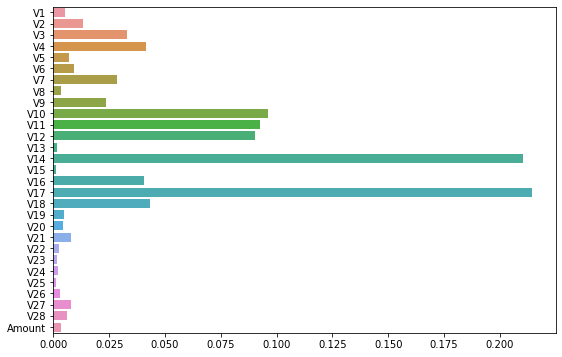

In [88]:
plt.figure(figsize = (9, 6))
sns.barplot(RF.feature_importances_,
            DF.columns.drop(['Class']))
plt.show()

> ### 4. Gradient Boosting Machine (GBM) Classifier

In [90]:
%%time

from sklearn.ensemble import GradientBoostingClassifier
GBC = GradientBoostingClassifier(loss = 'deviance',
                                 n_estimators = 500,
                                 learning_rate = 0.01,
                                 max_features = 3,
                                 max_depth = 3)
GBC.fit(X_train, y_train)

CPU times: user 3min 21s, sys: 309 ms, total: 3min 21s
Wall time: 3min 21s


  * 평가

In [91]:
confusion_matrix(y_test, GBC.predict(X_test))

array([[85290,     9],
       [   49,    95]])

In [95]:
print(accuracy_score(y_test, GBC.predict(X_test)), '\n')
print(precision_score(y_test, GBC.predict(X_test), pos_label= 1), '\n')
GBC_recall = recall_score(y_test, GBC.predict(X_test), pos_label= 1)
GBC_recall

0.9993211848834895 

0.9134615384615384 



0.6597222222222222

In [98]:
GBC.feature_importances_

array([0.00914472, 0.00728314, 0.01575729, 0.02517656, 0.00326917,
       0.00531476, 0.02615856, 0.01040504, 0.03450522, 0.12853182,
       0.05823301, 0.15305553, 0.00231768, 0.18166635, 0.00245017,
       0.05736808, 0.17243093, 0.03938706, 0.00257921, 0.01706906,
       0.00699708, 0.00421801, 0.00194965, 0.00331772, 0.00287156,
       0.00857835, 0.00976181, 0.00438658, 0.00581587])

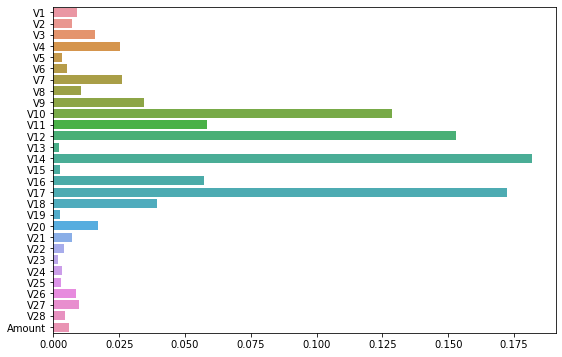

In [99]:
plt.figure(figsize=(9, 6))
sns.barplot(GBC.feature_importances_, 
            DF.columns.drop(['Class']))
plt.show()

> ### 5. eXtra Gradient Boost Classifier

In [140]:
%%time

from xgboost import XGBClassifier

XGB = XGBClassifier(booster='gbtree',
                    n_estimators=300,
                    learning_rate=0.01,
                    reg_lambda=0.05,
                    n_jobs=-1)

XGB.fit(X_train, y_train)

CPU times: user 3min 44s, sys: 132 ms, total: 3min 44s
Wall time: 1min 54s


In [141]:
confusion_matrix(y_test, XGB.predict(X_test))

array([[85288,    11],
       [   33,   111]])

In [142]:
print(accuracy_score(y_test, XGB.predict(X_test)), '\n')
print(precision_score(y_test, XGB.predict(X_test), pos_label= 1), '\n')
XGB_recall = recall_score(y_test, XGB.predict(X_test), pos_label= 1)
XGB_recall

0.9994850368081645 

0.9098360655737705 



0.7708333333333334

In [143]:
XGB.feature_importances_

array([0.00597275, 0.        , 0.03232041, 0.0135984 , 0.        ,
       0.02199467, 0.06547619, 0.02344923, 0.04135983, 0.09874241,
       0.00415451, 0.02459924, 0.        , 0.13714606, 0.00803349,
       0.03801987, 0.30966416, 0.        , 0.        , 0.03123685,
       0.01517494, 0.01697589, 0.00477828, 0.        , 0.00128322,
       0.04663773, 0.03470953, 0.02467238, 0.        ], dtype=float32)

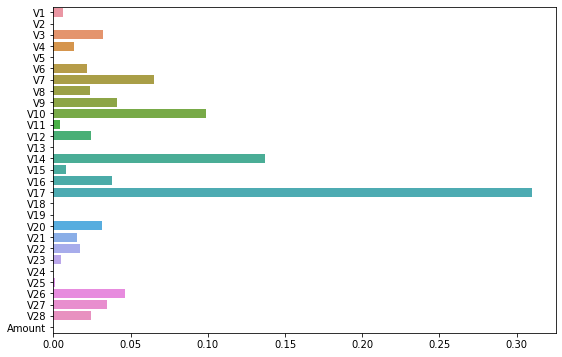

In [144]:
plt.figure(figsize=(9, 6))
sns.barplot(XGB.feature_importances_, 
            X.columns)
plt.show()

In [145]:
print('Logistic Regression recall: ', LR_recall)
print('Decision Tree Classifier: ', DT_recall)
print('Random Forest Classifier: ', RF_recall)
print('Gradient Boosting Machine: ', GBC_recall)
print('eXtra Gradient Boost Classifier: ', XGB_recall)

Logistic Regression recall:  0.6319444444444444
Decision Tree Classifier:  0.75
Random Forest Classifier:  0.75
Gradient Boosting Machine:  0.6597222222222222
eXtra Gradient Boost Classifier:  0.7708333333333334


* Decision Tree Classifier와 Random Forest Classifier가 현재 제일 성능이 좋은 모델이다.

# IV. Modeling (상위 10개)

* 상관계수 높게 나왔던 10개

In [146]:
X = DF[['V17', 'V14', 'V12', 'V10', 'V16', 'V3', 'V7', 'V11', 'V4', 'V18']]
y = DF.iloc[:,-1]

X.shape, y.shape

((284807, 10), (284807,))

In [147]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y,
                                                    test_size=0.3,
                                                    stratify=y,
                                                    random_state=2045)

X_train.shape, y_train.shape, X_test.shape, y_test.shape

((199364, 10), (199364,), (85443, 10), (85443,))

* Decision Tree, Random Forest 모델 진행

> ### 1. Decision Tree Classifier

In [113]:
%%time

from sklearn.tree import DecisionTreeClassifier

DT2 = DecisionTreeClassifier(criterion='entropy',
                            max_depth=5,
                            random_state=2045)

DT2.fit(X_train, y_train)

CPU times: user 3.07 s, sys: 6.45 ms, total: 3.07 s
Wall time: 3.07 s


In [114]:
confusion_matrix(y_test, DT2.predict(X_test))

array([[85275,    20],
       [   22,   126]])

In [128]:
print(accuracy_score(y_test, DT2.predict(X_test)), '\n')
print(precision_score(y_test, DT2.predict(X_test), pos_label= 1), '\n')
DT2_recall = recall_score(y_test, DT2.predict(X_test), pos_label= 1)
DT2_recall

0.9995084442259752 

0.863013698630137 



0.8513513513513513

In [117]:
DT2.feature_importances_


array([0.10949828, 0.70400179, 0.01451483, 0.11132939, 0.01326672,
       0.00311631, 0.01560849, 0.        , 0.0286642 , 0.        ])

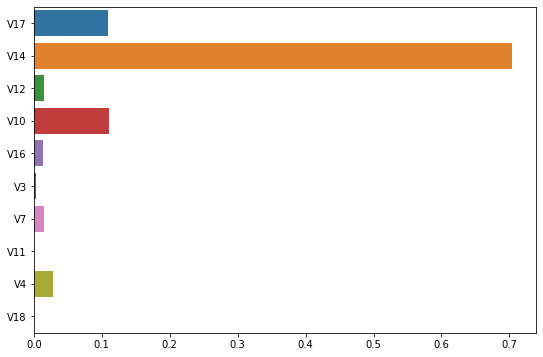

In [119]:
plt.figure(figsize=(9, 6))
sns.barplot(DT2.feature_importances_, X.columns)
plt.show()

> ### 2. Random Forest Classifier

In [120]:
%%time
from sklearn.ensemble import RandomForestClassifier
RF2 = RandomForestClassifier(criterion = 'entropy',
                            n_estimators = 100,
                            max_features = 4,
                            max_depth = 5,
                            random_state = 2045,
                            n_jobs = -1)
RF2.fit(X_train, y_train)

CPU times: user 2min 1s, sys: 148 ms, total: 2min 2s
Wall time: 1min 2s


In [121]:
confusion_matrix(y_test, RF2.predict(X_test))

array([[85283,    12],
       [   26,   122]])

In [122]:
print(accuracy_score(y_test, RF2.predict(X_test)), '\n')
print(precision_score(y_test, RF2.predict(X_test), pos_label= 1), '\n')
RF2_recall = recall_score(y_test, RF2.predict(X_test), pos_label= 1)
RF2_recall

0.9995552590615966 

0.9104477611940298 



0.8243243243243243

In [123]:
RF2.feature_importances_

array([0.29013568, 0.30436579, 0.13526494, 0.12906032, 0.02711277,
       0.00846912, 0.02440898, 0.04907249, 0.02737534, 0.00473457])

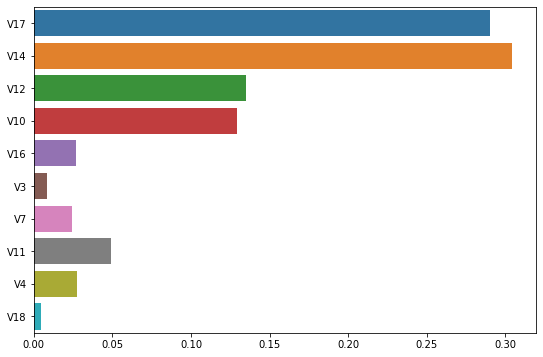

In [125]:
plt.figure(figsize=(9, 6))
sns.barplot(RF2.feature_importances_, X.columns)
plt.show()

In [129]:
print('Decision Tree Classifier: ', DT2_recall)
print('Random Forest Classifier: ', RF2_recall)


Decision Tree Classifier:  0.8513513513513513
Random Forest Classifier:  0.8243243243243243


* Decision Tree Classifier가 현재 제일 성능이 좋은 모델이다.